

# Project: Investigate a Dataset - ٍSoccer Matches

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this report, the soccer matches dataset from Kaggle was selected. I have chosen this dataset in order to mix, for the first time ever, my passion for soccer and my passion for data analysis. The selected dataset includes the data of matches played amongst european teams between 2008 and 2016, in addition the data includes the attributes of how those teams played and also the attributes of the players on those teams.



### Question(s) for Analysis

#### 1) What is the best mix of team attributes that leads to the highest precentages of wins?
From the datasets, the dataset of the matches played and the goals scored from the participating teams is given along with a data set with the attributes of these teams. These two datasets can be combined in order to answer this question.
##### 2) Are left footed players "naturally better" than right footed players as some may claim?
This question can also be answered from the combined dataset mentioned above.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling




### General Properties


In [6]:
df_country = pd.read_csv('Country.csv')
df_league = pd.read_csv('League.csv')
df_match = pd.read_csv('Match.csv')
df_player = pd.read_csv('Player.csv')
df_player_att = pd.read_csv('Player_Attributes.csv')
df_team = pd.read_csv('Team.csv')


# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


In [50]:
df_team_att = pd.read_csv('Team_attributes.csv')

In [7]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [8]:
df_league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [10]:
df_match.isnull().sum()

id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBD           11817
GBA           11817
BSH           11818
BSD           11818
BSA           11818
Length: 115, dtype: int64

In [11]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [12]:
df_player_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [13]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [14]:
df_team_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14


### Data Cleaning

 

In [204]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df_league['country'] = df_country[df_country['id'] == df_league['id']]['name']

In [205]:
df_league

,id,country_id,name,country
0,1,1,Belgium Jupiler League,Belgium
1,1729,1729,England Premier League,England
2,4769,4769,France Ligue 1,France
3,7809,7809,Germany 1. Bundesliga,Germany
4,10257,10257,Italy Serie A,Italy
5,13274,13274,Netherlands Eredivisie,Netherlands
6,15722,15722,Poland Ekstraklasa,Poland
7,17642,17642,Portugal Liga ZON Sagres,Portugal
8,19694,19694,Scotland Premier League,Scotland
9,21518,21518,Spain LIGA BBVA,Spain


### Cleaning the matches data set
Removed irrelevent columns that will not help in data explorations and only kept the relevent ones


Added new columns that will help in calculating the precentage won for each team in a given time period later on

##### id: The id of each match played, may be of use later in answering the first question

##### country_id and league_id: Not really needed, but may be of use later if another question about the data was to be answered

##### season and	date: The seaoson and date in which the game was played will help in differntiating each game because the team 
##### attributes dataset also includes the date of each team attribute

##### home_team_api_id	away_team_api_id : The apis of each team will help in distinguishing each team on the team attributes data set

##### home_team_goal	away_team_goal: These will help in determaining which team won


In [19]:
#gettig only the relevent data that will help with answering the questions

df_match = df_match[['id', 'country_id','league_id','season','date','match_api_id','home_team_api_id','away_team_api_id','home_team_goal','away_team_goal']]
df_match

,id,country_id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,2008-08-16 00:00:00,492477,7947,9985,1,3
...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,2015-09-22 00:00:00,1992091,10190,10191,1,0
25975,25976,24558,24558,2015/2016,2015-09-23 00:00:00,1992092,9824,10199,1,2
25976,25977,24558,24558,2015/2016,2015-09-23 00:00:00,1992093,9956,10179,2,0
25977,25978,24558,24558,2015/2016,2015-09-22 00:00:00,1992094,7896,10243,0,0


In [47]:
# adding a column for the winner and loser for each match
# -1 if a draw occurs

df_match['winner_api'] = ''
df_match['loser_api'] = ''
for i in range(df_match.shape[0]):
    if df_match['home_team_goal'][i] > df_match['away_team_goal'][i]:
        df_match['winner_api'][i] = df_match['home_team_api_id'][i]
        df_match['loser_api'][i] = df_match['away_team_api_id'][i]
    elif df_match['home_team_goal'][i] < df_match['away_team_goal'][i]:
        df_match['winner_api'][i] = df_match['away_team_api_id'][i]
        df_match['loser_api'][i] = df_match['home_team_api_id'][i]
    else:
        df_match['winner_api'][i] = -1
        df_match['loser_api'][i] = -1
df_match

<ipython-input-47-58d6747879dd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_match['winner_api'][i] = -1
<ipython-input-47-58d6747879dd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_match['loser_api'][i] = -1
<ipython-input-47-58d6747879dd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_match['winner_api'][i] = df_match['away_team_api_id'][i]
<ipython-input-47-58d6747879dd>:9: SettingWithCopyWarning: 
A value is tr

,id,country_id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,winner_api,loser_api
0,1,1,1,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1,-1,-1
1,2,1,1,2008/2009,2008-08-16 00:00:00,492474,10000,9994,0,0,-1,-1
2,3,1,1,2008/2009,2008-08-16 00:00:00,492475,9984,8635,0,3,8635,9984
3,4,1,1,2008/2009,2008-08-17 00:00:00,492476,9991,9998,5,0,9991,9998
4,5,1,1,2008/2009,2008-08-16 00:00:00,492477,7947,9985,1,3,9985,7947
...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,2015-09-22 00:00:00,1992091,10190,10191,1,0,10190,10191
25975,25976,24558,24558,2015/2016,2015-09-23 00:00:00,1992092,9824,10199,1,2,10199,9824
25976,25977,24558,24558,2015/2016,2015-09-23 00:00:00,1992093,9956,10179,2,0,9956,10179
25977,25978,24558,24558,2015/2016,2015-09-22 00:00:00,1992094,7896,10243,0,0,-1,-1


In [58]:
df_match['date'] = pd.to_datetime(df_match['date'])
df_match

,id,country_id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,winner_api,loser_api
0,1,1,1,2008/2009,2008-08-17,492473,9987,9993,1,1,-1,-1
1,2,1,1,2008/2009,2008-08-16,492474,10000,9994,0,0,-1,-1
2,3,1,1,2008/2009,2008-08-16,492475,9984,8635,0,3,8635,9984
3,4,1,1,2008/2009,2008-08-17,492476,9991,9998,5,0,9991,9998
4,5,1,1,2008/2009,2008-08-16,492477,7947,9985,1,3,9985,7947
...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,2015-09-22,1992091,10190,10191,1,0,10190,10191
25975,25976,24558,24558,2015/2016,2015-09-23,1992092,9824,10199,1,2,10199,9824
25976,25977,24558,24558,2015/2016,2015-09-23,1992093,9956,10179,2,0,9956,10179
25977,25978,24558,24558,2015/2016,2015-09-22,1992094,7896,10243,0,0,-1,-1


In [59]:
# making a years column for and more general access for the date of each match

df_match['year'] = df_match['date'].dt.year
df_match

,id,country_id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,winner_api,loser_api,year
0,1,1,1,2008/2009,2008-08-17,492473,9987,9993,1,1,-1,-1,2008
1,2,1,1,2008/2009,2008-08-16,492474,10000,9994,0,0,-1,-1,2008
2,3,1,1,2008/2009,2008-08-16,492475,9984,8635,0,3,8635,9984,2008
3,4,1,1,2008/2009,2008-08-17,492476,9991,9998,5,0,9991,9998,2008
4,5,1,1,2008/2009,2008-08-16,492477,7947,9985,1,3,9985,7947,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,2015-09-22,1992091,10190,10191,1,0,10190,10191,2015
25975,25976,24558,24558,2015/2016,2015-09-23,1992092,9824,10199,1,2,10199,9824,2015
25976,25977,24558,24558,2015/2016,2015-09-23,1992093,9956,10179,2,0,9956,10179,2015
25977,25978,24558,24558,2015/2016,2015-09-22,1992094,7896,10243,0,0,-1,-1,2015


In [56]:
df_team_att['date'] = pd.to_datetime(df_team_att['date'])
df_team_att

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassingClass,chanceCreationCrossingClass,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressureClass,defenceAggressionClass,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22,Balanced,Little,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
1,2,434,9930,2014-09-19,Balanced,Normal,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
2,3,434,9930,2015-09-10,Balanced,Normal,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
3,4,77,8485,2010-02-22,Fast,Little,Long,Organised,Risky,Lots,Lots,Organised,Medium,Double,Wide,Cover
4,5,77,8485,2011-02-22,Balanced,Little,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22,Balanced,Little,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
1454,1455,15005,10000,2012-02-22,Balanced,Little,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
1455,1456,15005,10000,2013-09-20,Balanced,Little,Mixed,Organised,Normal,Normal,Little,Organised,Medium,Press,Normal,Cover
1456,1457,15005,10000,2014-09-19,Balanced,Normal,Mixed,Organised,Normal,Normal,Little,Organised,Medium,Press,Normal,Cover


In [57]:
# Also making a years column for and more general access for the date of each team's attributes

df_team_att['year'] = df_team_att['date'].dt.year

In [94]:
# getting the number of games played and the number of games won and the number of games lost for each team in 
# and then combining it with the team attribute data frame


df_team_att['played'] = ''
df_team_att['won'] = ''
df_team_att['lost'] = ''

done = 0
z = 0
while z < (df_team_att.shape[0]):
    for i in range(df_team_att['team_api_id'].value_counts()[df_team_att['team_api_id'][z]]):
        played = 0
        won = 0
        lost = 0
        for j in range(df_match.shape[0]):
            if i < df_team_att['team_api_id'].value_counts()[df_team_att['team_api_id'][z]] - 1: 
                if df_match['year'][j] >= df_team_att['year'][i+done] and df_match['year'][j] < df_team_att['year'][i+1 +done]:
                    if (df_match['home_team_api_id'][j] == df_team_att['team_api_id'][i+done] or df_match['away_team_api_id'][j] == df_team_att['team_api_id'][i+done]):
                        played+=1
                    if(df_match['winner_api'][j]== df_team_att['team_api_id'][i+done]):
                        won+=1
                    if(df_match['loser_api'][j]== df_team_att['team_api_id'][i+done]):
                        lost+=1

                
            else:
                if df_match['year'][j] >= df_team_att['year'][i+done]:
                    if (df_match['home_team_api_id'][j] == df_team_att['team_api_id'][i+done] or df_match['away_team_api_id'][j] == df_team_att['team_api_id'][i+done]):
                        played+=1
                    if(df_match['winner_api'][j]== df_team_att['team_api_id'][i+done]):
                        won+=1
                    if(df_match['loser_api'][j]== df_team_att['team_api_id'][i+done]):
                        lost+=1
        df_team_att['played'][i+done] = played
        df_team_att['won'][i+done] = won
        df_team_att['lost'][i+done] = lost
        #print(played)
    done += df_team_att['team_api_id'].value_counts()[df_team_att['team_api_id'][z]]
    z = done
    print(z, end = '\r')
df_team_att

<ipython-input-94-f0bb7b5a1c51>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_team_att['played'][i+done] = played
<ipython-input-94-f0bb7b5a1c51>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_team_att['won'][i+done] = won
<ipython-input-94-f0bb7b5a1c51>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_team_att['lost'][i+done] = lost


,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassingClass,chanceCreationCrossingClass,...,chanceCreationPositioningClass,defencePressureClass,defenceAggressionClass,defenceTeamWidthClass,defenceDefenderLineClass,year,played,won,tied,lost
0,1,434,9930,2010-02-22,Balanced,Little,Mixed,Organised,Normal,Normal,...,Organised,Medium,Press,Normal,Cover,2010,35,10,,21
1,2,434,9930,2014-09-19,Balanced,Normal,Mixed,Organised,Normal,Normal,...,Organised,Medium,Press,Normal,Cover,2014,37,10,,17
2,3,434,9930,2015-09-10,Balanced,Normal,Mixed,Organised,Normal,Normal,...,Organised,Medium,Press,Normal,Cover,2015,18,3,,10
3,4,77,8485,2010-02-22,Fast,Little,Long,Organised,Risky,Lots,...,Organised,Medium,Double,Wide,Cover,2010,40,11,,23
4,5,77,8485,2011-02-22,Balanced,Little,Mixed,Organised,Normal,Normal,...,Organised,Medium,Press,Normal,Cover,2011,41,11,,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22,Balanced,Little,Mixed,Organised,Normal,Normal,...,Organised,Medium,Press,Normal,Cover,2011,28,3,,14
1454,1455,15005,10000,2012-02-22,Balanced,Little,Mixed,Organised,Normal,Normal,...,Organised,Medium,Press,Normal,Cover,2012,33,17,,8
1455,1456,15005,10000,2013-09-20,Balanced,Little,Mixed,Organised,Normal,Normal,...,Organised,Medium,Press,Normal,Cover,2013,8,6,,1
1456,1457,15005,10000,2014-09-19,Balanced,Normal,Mixed,Organised,Normal,Normal,...,Organised,Medium,Press,Normal,Cover,2014,21,7,,10


In [105]:
for i in range(df_team_att.shape[0]):
    if df_team_att['played'][i]>0:
        df_team_att['Won Percent'][i] = (df_team_att['won'][i]/df_team_att['played'][i]) * 100
    else:
        df_team_att['Won Percent'][i] = 0



<ipython-input-105-04b50d6d3e74>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_team_att['Won Percent'][i] = (df_team_att['won'][i]/df_team_att['played'][i]) * 100
<ipython-input-105-04b50d6d3e74>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_team_att['Won Percent'][i] = 0


In [106]:
df_team_att

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassingClass,chanceCreationCrossingClass,...,chanceCreationPositioningClass,defencePressureClass,defenceAggressionClass,defenceTeamWidthClass,defenceDefenderLineClass,year,played,won,lost,Won Percent
0,1,434,9930,2010-02-22,Balanced,Little,Mixed,Organised,Normal,Normal,...,Organised,Medium,Press,Normal,Cover,2010,35,10,21,28
1,2,434,9930,2014-09-19,Balanced,Normal,Mixed,Organised,Normal,Normal,...,Organised,Medium,Press,Normal,Cover,2014,37,10,17,27
2,3,434,9930,2015-09-10,Balanced,Normal,Mixed,Organised,Normal,Normal,...,Organised,Medium,Press,Normal,Cover,2015,18,3,10,16
3,4,77,8485,2010-02-22,Fast,Little,Long,Organised,Risky,Lots,...,Organised,Medium,Double,Wide,Cover,2010,40,11,23,27
4,5,77,8485,2011-02-22,Balanced,Little,Mixed,Organised,Normal,Normal,...,Organised,Medium,Press,Normal,Cover,2011,41,11,20,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22,Balanced,Little,Mixed,Organised,Normal,Normal,...,Organised,Medium,Press,Normal,Cover,2011,28,3,14,10
1454,1455,15005,10000,2012-02-22,Balanced,Little,Mixed,Organised,Normal,Normal,...,Organised,Medium,Press,Normal,Cover,2012,33,17,8,51
1455,1456,15005,10000,2013-09-20,Balanced,Little,Mixed,Organised,Normal,Normal,...,Organised,Medium,Press,Normal,Cover,2013,8,6,1,75
1456,1457,15005,10000,2014-09-19,Balanced,Normal,Mixed,Organised,Normal,Normal,...,Organised,Medium,Press,Normal,Cover,2014,21,7,10,33


<a id='eda'></a>
## Exploratory Data Analysis




### Which mix of attributes had the most average wins?

In [107]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df_team_att.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date',
       'buildUpPlaySpeedClass', 'buildUpPlayDribblingClass',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassingClass', 'chanceCreationCrossingClass',
       'chanceCreationShootingClass', 'chanceCreationPositioningClass',
       'defencePressureClass', 'defenceAggressionClass',
       'defenceTeamWidthClass', 'defenceDefenderLineClass', 'year', 'played',
       'won', 'lost', 'Won Percent'],
      dtype='object')

In [111]:
# seperating each attribute with Won Percent to see which class among the attribute has the highest win percentage

df_BU_speed = df_team_att[['buildUpPlaySpeedClass', 'Won Percent' ]]
df_BU_dribble = df_team_att[['buildUpPlayDribblingClass', 'Won Percent' ]]
df_BU_pass = df_team_att[['buildUpPlayPassingClass', 'Won Percent' ]]
df_BU_playpos = df_team_att[['buildUpPlayPositioningClass', 'Won Percent' ]]
df_CC_pass = df_team_att[['chanceCreationPassingClass', 'Won Percent' ]]
df_CC_cross = df_team_att[['chanceCreationCrossingClass', 'Won Percent' ]]
df_CC_shoot = df_team_att[['chanceCreationShootingClass', 'Won Percent' ]]
df_CC_pos = df_team_att[['chanceCreationPositioningClass', 'Won Percent' ]]
df_D_press = df_team_att[['defencePressureClass', 'Won Percent' ]]
df_D_agress = df_team_att[['defenceAggressionClass', 'Won Percent' ]]
df_D_width = df_team_att[['defenceTeamWidthClass', 'Won Percent' ]]
df_D_line = df_team_att[['defenceDefenderLineClass', 'Won Percent' ]]


In [152]:
# created a function which calculates the average won percentage for each class in the attribute

def func(df):
    df[df['Won Percent'] != 0]
    df = df.reset_index(drop = True)
    unique_vals = df.iloc[:,0].unique()
    z=0
    list_of_avgs = []
    for i in range(len(unique_vals)):
        total = 0
        number_of_occurs = df.iloc[:,0].value_counts()[unique_vals[i]]
        for j in range(z,z+number_of_occurs):
            total+=df.iloc[:,1][j]
        z+=number_of_occurs
        avg = total/number_of_occurs
        list_of_avgs.append(avg)
    df_counted_vals = pd.DataFrame([unique_vals,list_of_avgs])
    df_counted_vals = df_counted_vals.transpose()
    df_counted_vals.columns = ['Class', 'Average Win Percent']
    return df_counted_vals

In [155]:
df_BU_Speed = func(df_BU_speed)
df_BU_dribble = func(df_BU_dribble)
df_BU_pass = func(df_BU_pass)
df_BU_playpos = func(df_BU_playpos)
df_CC_pass = func(df_CC_pass)
df_CC_cross = func(df_CC_cross)
df_CC_shoot = func(df_CC_shoot)
df_CC_pos = func(df_CC_pos)
df_D_press = func(df_D_press)
df_D_agress = func(df_D_agress)
df_D_width = func(df_D_width)
df_D_line = func(df_D_line)

In [157]:
df_BU_Speed

,Class,Average Win Percent
0,Balanced,28.294764
1,Fast,33.796512
2,Slow,34.852941


In [158]:
df_BU_dribble

,Class,Average Win Percent
0,Little,29.26992
1,Lots,36.809524
2,Normal,29.351039


In [159]:
df_BU_pass

,Class,Average Win Percent
0,Long,22.851064
1,Mixed,29.088188
2,Short,37.25


In [160]:
df_BU_playpos

,Class,Average Win Percent
0,Free Form,50.097222
1,Organised,28.327561


In [161]:
df_CC_pass

,Class,Average Win Percent
0,Normal,28.981316
1,Risky,33.25731
2,Safe,26.892857


In [162]:
df_CC_cross

,Class,Average Win Percent
0,Little,29.442308
1,Lots,30.298578
2,Normal,29.242678


In [163]:
df_CC_shoot

,Class,Average Win Percent
0,Little,38.135135
1,Lots,37.177665
2,Normal,27.887255


In [164]:
df_CC_pos

,Class,Average Win Percent
0,Free Form,44.651007
1,Organised,27.666921


In [165]:
df_D_press

,Class,Average Win Percent
0,Deep,25.831169
1,High,32.360656
2,Medium,29.69992


In [166]:
df_D_agress

,Class,Average Win Percent
0,Contain,29.094118
1,Double,31.444444
2,Press,29.264521


In [167]:
df_D_width

,Class,Average Win Percent
0,Narrow,25.540984
1,Normal,29.55521
2,Wide,29.756757


In [168]:
df_D_line

,Class,Average Win Percent
0,Cover,29.162261
1,Offside Trap,32.8125


<BarContainer object of 3 artists>

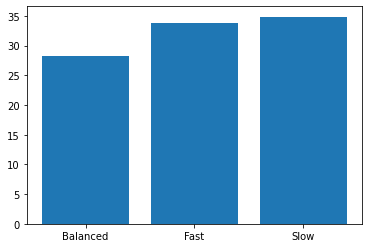

In [175]:
plt.bar(x = 'Class',height ='Average Win Percent', data = df_BU_Speed)

<BarContainer object of 3 artists>

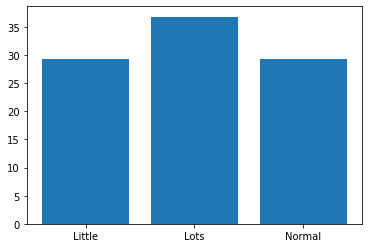

In [177]:
plt.bar(x = 'Class',height ='Average Win Percent', data = df_BU_dribble)

<BarContainer object of 3 artists>

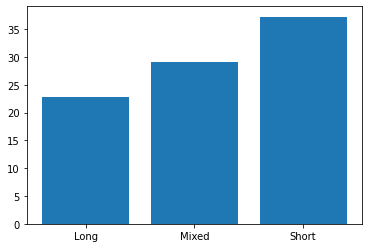

In [178]:
plt.bar(x = 'Class',height ='Average Win Percent', data = df_BU_pass)

<BarContainer object of 2 artists>

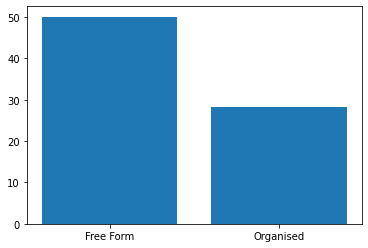

In [179]:
plt.bar(x = 'Class',height ='Average Win Percent', data = df_BU_playpos)

<BarContainer object of 3 artists>

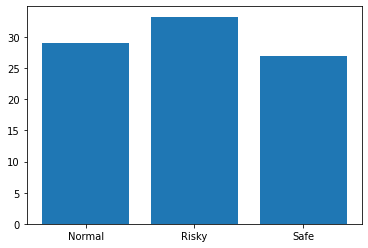

In [180]:
plt.bar(x = 'Class',height ='Average Win Percent', data = df_CC_pass)

<BarContainer object of 3 artists>

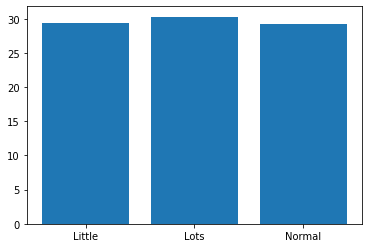

In [181]:
plt.bar(x = 'Class',height ='Average Win Percent', data = df_CC_cross)

<BarContainer object of 3 artists>

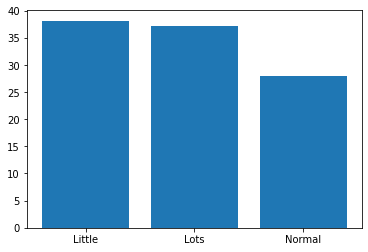

In [182]:
plt.bar(x = 'Class',height ='Average Win Percent', data = df_CC_shoot)

<BarContainer object of 2 artists>

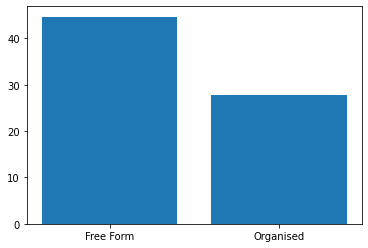

In [183]:
plt.bar(x = 'Class',height ='Average Win Percent', data = df_CC_pos)

<BarContainer object of 3 artists>

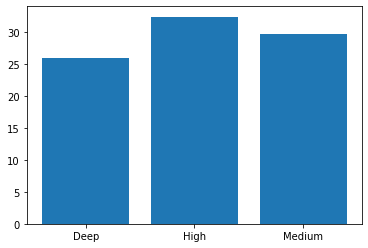

In [184]:
plt.bar(x = 'Class',height ='Average Win Percent', data = df_D_press)

<BarContainer object of 3 artists>

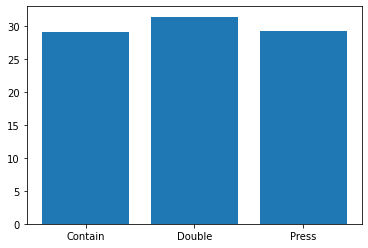

In [185]:
plt.bar(x = 'Class',height ='Average Win Percent', data = df_D_agress)

<BarContainer object of 3 artists>

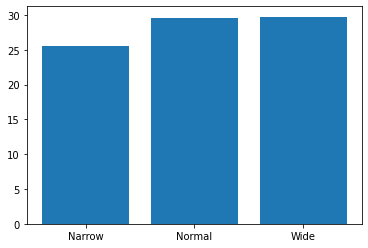

In [186]:
plt.bar(x = 'Class',height ='Average Win Percent', data = df_D_width)

<BarContainer object of 2 artists>

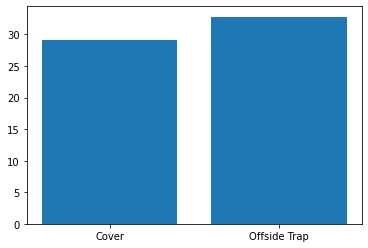

In [187]:
plt.bar(x = 'Class',height ='Average Win Percent', data = df_D_line)

###  Are left footed players "naturally better" than right footed players as some may claim?

In [201]:

df_right_foot = df_player_att[df_player_att['preferred_foot'] == 'right']
df_left_foot = df_player_att[df_player_att['preferred_foot'] == 'left']

#### The distribution of overall rating among right footed players

array([[<AxesSubplot:title={'center':'overall_rating'}>]], dtype=object)

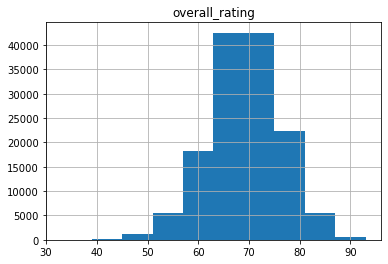

In [202]:
df_right_foot.hist(column = 'overall_rating')

#### The distribution of overall rating among left footed players

array([[<AxesSubplot:title={'center':'overall_rating'}>]], dtype=object)

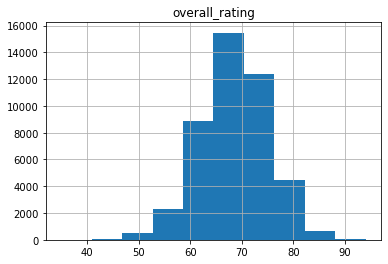

In [197]:
df_left_foot.hist(column = 'overall_rating')

In [203]:
df_right_foot['overall_rating'].mean()

68.59155835241928

In [200]:
df_left_foot['overall_rating'].mean()

68.6261820132788

#### The average of the overall rating among right footed players was: 68.59155835241928 and for left footed players was: 68.6261820132788

<a id='conclusions'></a>
## Conclusions

### Results

#### Question 1

Apperantly from the visualisations and the calculated data the best mix of attributes that will yeild the highest win precentages are:

Build up speed: slow

Build up dribbling: lots

Build up passing: short

Build up player positioning: free-form

Chance creation passing: risky

Chance creation crossing: lots

Chance creation shooting: little

Chance creation positioning: free-form

Defense press: high

Defense aggression: double

Defense width: wide

Defense line: offside trap

#### Question 2

There is no real difference between overall rating distribution for right footed players and left footed players.

The histograms for both are very similar, both exhbiting a normal curve.

The averages are also very similar.

### Limitations



In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])